In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
train_csv=pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/agarwalapurb/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv')
train_csv['Age'].fillna(train_csv['Age'].median(),inplace=True)
train_csv.drop('PassengerId', inplace=True, axis=1)
train_csv['Sex'].replace({'male':1,'female':2},inplace=True)
train_y=(train_csv.pop('Survived')).to_numpy().reshape(1,-1)
train_x=(train_csv.to_numpy()).T
train_x=(train_x-(np.mean(train_x,axis=1).reshape(-1,1)))/(np.std(train_x,axis=1).reshape(-1,1))
test_csv=pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/agarwalapurb/ICG-Summer-Program-2021-DS/main/Assignment-1/data/test.csv')
test_csv['Age'].fillna(test_csv['Age'].median(),inplace=True)
test_csv.drop('PassengerId', inplace=True, axis=1)
test_csv['Sex'].replace({'male':1,'female':2},inplace=True)
test_y=(test_csv.pop('Survived')).to_numpy().reshape(1,-1)
test_x=(test_csv.to_numpy()).T
test_x = (test_x-(np.mean(test_x,axis=1).reshape(-1,1)))/(np.std(test_x,axis=1).reshape(-1,1))

In [4]:
def sigmoid(x):
  s = 1/(1+np.exp(-x))
  return s

In [5]:
def initialise(x):
  w=np.abs(np.random.randn(x.shape[0],1))
  b=0.0
  return w, b

In [6]:
def propagate(X,Y,w,b):
  A=sigmoid(np.dot(w.T,X)+b)
  loss=(-1/(X.shape[1]))*(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))
  #loss=np.squeeze(np.array(loss))
  dw=(1/(X.shape[1]))*np.dot(X,(A-Y).T)
  db=(1/(X.shape[1]))*np.sum(A-Y)
  return dw, db, loss[0][0]

In [7]:
def optimization(X,Y,w,b,lr,n):

  for i in range(n):
    dw,db,loss=propagate(X,Y,w,b)
    w=w-lr*dw
    b=b-lr*db
  return w,b,loss

In [8]:
def predict(X,w,b):
  A=sigmoid(np.dot(w.T,X)+b)
  Y_predicted=[]
  for i in range(len(A)):
    if A[0][i]>0.5:
      Y_predicted.append(1)
    else:
      Y_predicted.append(0)
  Y_predicted=np.array(Y_predicted)
  return Y_predicted

In [44]:
def plot1(train_x,train_y,test_x,test_y,lr,n):
  tr_acc=[]
  te_acc=[]
  l=[]
  num=[]
  for i in range(4000,n,1000):
    w,b=initialise(train_x)
    w,b,loss=optimization(train_x,train_y,w,b,lr,i)
    y_pred_tr=predict(train_x,w,b)
    y_pred_te=predict(test_x,w,b)
    l.append(loss)
    tr_acc.append(100-np.mean(np.abs(y_pred_tr-train_y)*100))
    te_acc.append(100-np.mean(np.abs(y_pred_te-test_y)*100))
    num.append(i)
  print(l)
  plt.plot(num,l)
  plt.show()
  plt.plot(num,tr_acc)
  plt.plot(num,te_acc)
  plt.show()

[0.4511085105342378, 0.45124097501667393, 0.45070535332783, 0.45059912426379517, 0.45063156207674104, 0.45057586791025434, 0.45051480275320865, 0.45051107847390975, 0.4505087697954267, 0.4505078797835538, 0.4505078583302031, 0.4505076641435384, 0.4505077167269884, 0.4505076667503666, 0.4505076577114715, 0.45050764800214876]


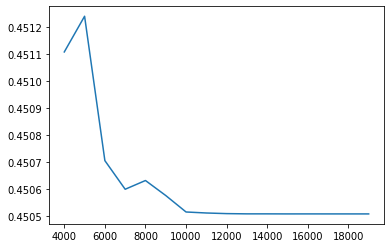

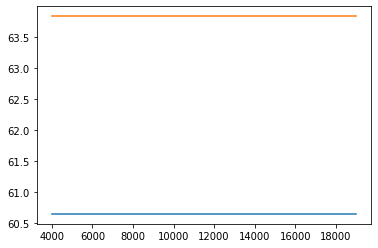

In [57]:
plot1(train_x,train_y,test_x,test_y,0.01,20000)

In [31]:
def model(train_x,train_y,test_x,test_y,lr,n):
    w,b=initialise(train_x)
    w,b,loss=optimization(train_x,train_y,w,b,lr,n)
    y_pred_tr=predict(train_x,w,b)
    y_pred_te=predict(test_x,w,b)
    tr_acc=100-np.mean(np.abs(y_pred_tr-train_y)*100)
    te_acc=100-np.mean(np.abs(y_pred_te-test_y)*100)
    print(f"Train Accuracy - {tr_acc}")
    print(f"Test Accuracy - {te_acc}")

In [58]:
model(train_x,train_y,test_x,test_y,0.01,10000)

Train Accuracy - 60.645161290322584
Test Accuracy - 63.837638376383765


In [63]:
def plot2(train_x,train_y,test_x,test_y,lr,n):
  tr_acc=[]
  te_acc=[]
  l=[]
  num=[]
  for i in range(1,lr,1):
    w,b=initialise(train_x)
    w,b,loss=optimization(train_x,train_y,w,b,i/1000,n)
    y_pred_tr=predict(train_x,w,b)
    y_pred_te=predict(test_x,w,b)
    l.append(loss)
    tr_acc.append(100-np.mean(np.abs(y_pred_tr-train_y)*100))
    te_acc.append(100-np.mean(np.abs(y_pred_te-test_y)*100))
    num.append(i)
  print(l)
  plt.plot(num,l)
  plt.show()
  plt.plot(num,tr_acc)
  plt.plot(num,te_acc)
  plt.show()

[0.4787825429938083, 0.4516073292030274, 0.4508159927967286, 0.4505498920128695, 0.4505193111360367, 0.45050857789944637, 0.4505077554423534, 0.4505076820686107, 0.45050764885754324, 0.45050764772488594, 0.45050764764297435, 0.45050764762208706, 0.450507647614014, 0.4505076476134422, 0.4505076476132783, 0.45050764761328266, 0.4505076476132692, 0.4505076476132679, 0.45050764761326784]


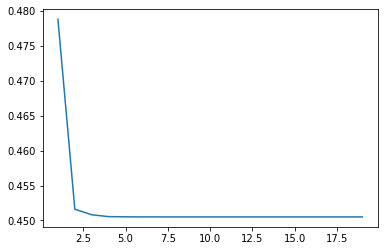

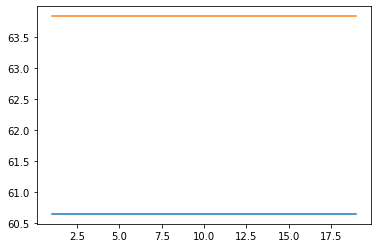

In [66]:
plot2(train_x,train_y,test_x,test_y,20,20000)